In [1]:
"hello"

'hello'

# gan

In [78]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_df = pd.read_csv('../datasets/crop_fertilizers.csv')

original_data = {
    'temperature': data_df['Temperature'].values,
    'humidity': data_df['Humidity'].values
}

# Normalize the data
temperature_mean, temperature_std = np.mean(original_data['temperature']), np.std(original_data['temperature'])
humidity_mean, humidity_std = np.mean(original_data['humidity']), np.std(original_data['humidity'])

normalized_temperature = (original_data['temperature'] - temperature_mean) / temperature_std
normalized_humidity = (original_data['humidity'] - humidity_mean) / humidity_std

# Prepare data for training
data = np.vstack((normalized_temperature, normalized_humidity)).T
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(50).batch(50)

# Generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='tanh'))
    return model

# Discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training the GAN
@tf.function
def train_step(data, batch_size):
    noise = tf.random.normal([batch_size, 2])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs, batch_size):
    for epoch in range(epochs):
        for data_batch in dataset:
            train_step(data_batch, batch_size)
        if epoch % 100 == 0:
            print(f'Epoch {epoch} completed')

# Training parameters
EPOCHS = 2000
BATCH_SIZE = 50

# Training the GAN
train(dataset, EPOCHS, BATCH_SIZE)

# Generating synthetic data
synthetic_data = generator(tf.random.normal([200, 2])).numpy()

# Denormalizing synthetic data
synthetic_temperature = synthetic_data[:, 0] * temperature_std + temperature_mean
synthetic_humidity = synthetic_data[:, 1] * humidity_std + humidity_mean

# Plotting synthetic data
plt.scatter(synthetic_temperature, synthetic_humidity, label='Synthetic Data')
plt.scatter(original_data['temperature'], original_data['humidity'], label='Original Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()

/home/nishanth/Documents/codmav/code/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-14 14:29:27.114790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.125739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.133390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.143737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.15231

Epoch 0 completed


2024-06-14 14:29:27.327216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.341569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.352601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.363528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.374564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.384678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:27.395836: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 100 completed


2024-06-14 14:29:28.349576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.360158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.385897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.410223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.440320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.453397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:28.470231: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 200 completed


2024-06-14 14:29:29.381905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.392529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.403986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.415324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.426196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.434244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-14 14:29:29.445404: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 300 completed


2024-06-14 14:29:30.409570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


KeyboardInterrupt: 

In [15]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data_df = pd.read_csv('Crop_Recommendation.csv')

# Select the first 7 columns of the dataset
selected_columns = data_df.columns[:7]
original_data = data_df[selected_columns].values

# Normalize the data
means = np.mean(original_data, axis=0)
stds = np.std(original_data, axis=0)
normalized_data = (original_data - means) / stds

# Prepare data for training
data = tf.data.Dataset.from_tensor_slices(normalized_data).shuffle(50).batch(50)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(7, activation='tanh'))
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training the GAN
@tf.function
def train_step(data, batch_size):
    noise = tf.random.normal([batch_size, 7])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs, batch_size):
    for epoch in range(epochs):
        for data_batch in dataset:
            train_step(data_batch, batch_size)
        if epoch % 100 == 0:
            print(f'Epoch {epoch} completed')

# Training parameters
EPOCHS = 2000
BATCH_SIZE = 50

# Training the GAN
train(data, EPOCHS, BATCH_SIZE)

# Generating synthetic data
synthetic_data = generator(tf.random.normal([200, 7])).numpy()

# Denormalizing synthetic data
denormalized_synthetic_data = synthetic_data * stds + means

# Plotting synthetic data against original data for each feature
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(selected_columns):
    ax = axs[i // 4, i % 4]
    ax.scatter(denormalized_synthetic_data[:, i], np.zeros(denormalized_synthetic_data.shape[0]), label='Synthetic Data', alpha=0.6)
    ax.scatter(original_data[:, i], np.ones(original_data.shape[0]), label='Original Data', alpha=0.6)
    ax.set_xlabel(col)
    ax.legend()

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'distutils'

# gan and vae

2/2 [==============================] - 0s 5ms/step
Epoch: 0, Discriminator Loss: 0.6255615949630737, GAN Loss: 0.6630164384841919
2/2 [==============================] - 0s 4ms/step
Epoch: 100, Discriminator Loss: 0.6223906874656677, GAN Loss: 0.6545366048812866
2/2 [==============================] - 0s 4ms/step
Epoch: 200, Discriminator Loss: 0.6625548005104065, GAN Loss: 0.6867153644561768
2/2 [==============================] - 0s 5ms/step
Epoch: 300, Discriminator Loss: 0.7144618034362793, GAN Loss: 0.7285376191139221
2/2 [==============================] - 0s 5ms/step
Epoch: 400, Discriminator Loss: 0.6815308332443237, GAN Loss: 0.8441245555877686
2/2 [==============================] - 0s 5ms/step
Epoch: 500, Discriminator Loss: 0.6814686059951782, GAN Loss: 0.7687498331069946
2/2 [==============================] - 0s 5ms/step
Epoch: 600, Discriminator Loss: 0.6902746558189392, GAN Loss: 0.657636284828186
2/2 [==============================] - 0s 5ms/step
Epoch: 700, Discriminator Lo

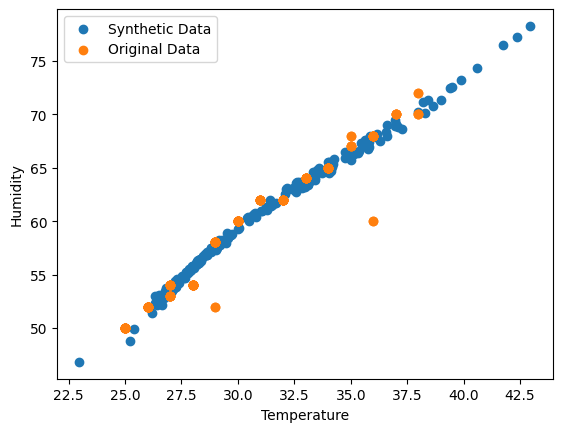

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
data_df = pd.read_csv('crop_fertilizers.csv')

original_data = {
    'temperature': data_df['Temparature'].values,
    'humidity': data_df['Humidity '].values
}

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(np.vstack((original_data['temperature'], original_data['humidity'])).T)

# VAE Model
latent_dim = 2

# Custom Sampling Layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

# Encoder
encoder_inputs = layers.Input(shape=(2,))
x = layers.Dense(16, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)
z = Sampling()([z_mean, z_log_var])

encoder = Model(encoder_inputs, [z_mean, z_log_var, z])

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(16, activation='relu')(latent_inputs)
outputs = layers.Dense(2)(x)

decoder = Model(latent_inputs, outputs)

# Custom VAE Model
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        # Add KL divergence regularization loss
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(kl_loss)
        return reconstructed

vae = VAE(encoder, decoder)

# Compile the VAE
vae.compile(optimizer='adam', loss='mse')

# GAN Model
generator_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(16, activation='relu')(generator_input)
generator_output = layers.Dense(2)(x)

generator = Model(generator_input, generator_output)

discriminator_input = layers.Input(shape=(2,))
x = layers.Dense(16, activation='relu')(discriminator_input)
discriminator_output = layers.Dense(1, activation='sigmoid')(x)

discriminator = Model(discriminator_input, discriminator_output)

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Freeze discriminator during combined model training
discriminator.trainable = False

# Combined VAE-GAN model
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

# Compile the GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training parameters
epochs = 2000
batch_size = 50

# Training the VAE
vae.fit(normalized_data, normalized_data, epochs=200, batch_size=batch_size, verbose=0)

# Training the GAN
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)
    real_data = normalized_data[np.random.randint(0, normalized_data.shape[0], batch_size)]
    combined_data = np.concatenate([real_data, generated_data])

    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))
    labels_combined = np.concatenate([labels_real, labels_fake])

    discriminator_loss = discriminator.train_on_batch(combined_data, labels_combined)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gan_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, GAN Loss: {gan_loss}")

# Generate synthetic data
synthetic_data = generator.predict(np.random.normal(0, 1, (200, latent_dim)))

# Denormalize synthetic data
synthetic_data = scaler.inverse_transform(synthetic_data)

# Plotting synthetic data
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], label='Synthetic Data')
plt.scatter(original_data['temperature'], original_data['humidity'], label='Original Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# vae

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 1.0847
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1414
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.1155
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9709
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0065
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.9309
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9873
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 0.9379
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8773
Epoch 10/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8818
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9211
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9528
Epoch 13/200
5/5 [==============================] - 0s 4ms/st

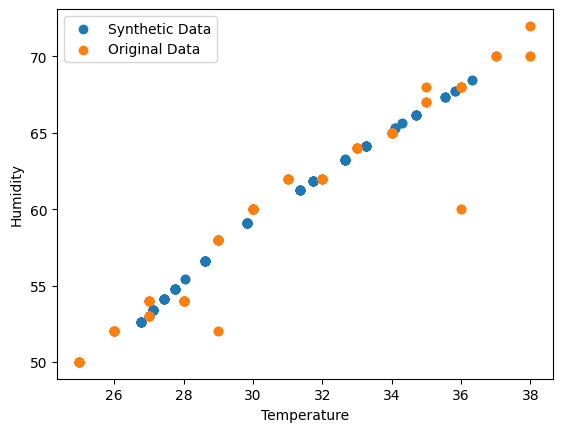

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_df = pd.read_csv('Crop_Recommendation.csv')

original_data = {
    'temperature': data_df['Temperature'].values,
    'humidity': data_df['Humidity'].values
}

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(np.vstack((original_data['temperature'], original_data['humidity'])).T)

# VAE Model
latent_dim = 2

# Encoder
encoder_inputs = layers.Input(shape=(2,))
x = layers.Dense(16, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z])

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(16, activation='relu')(latent_inputs)
outputs = layers.Dense(2)(x)

decoder = models.Model(latent_inputs, outputs)

# Custom VAE Model
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)

        # Add KL divergence regularization loss
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(kl_loss)
        return reconstructed

vae = VAE(encoder, decoder)

# Compile the model
vae.compile(optimizer='adam', loss='mse')

# Training parameters
epochs = 200
batch_size = 50

# Training the VAE
vae.fit(normalized_data, normalized_data, epochs=epochs, batch_size=batch_size)

# Generate synthetic data
z_mean, _, _ = encoder.predict(normalized_data)
synthetic_data = decoder.predict(z_mean)

# Denormalize synthetic data
synthetic_data = scaler.inverse_transform(synthetic_data)

# Plotting synthetic data
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], label='Synthetic Data')
plt.scatter(original_data['temperature'], original_data['humidity'], label='Original Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('../datasets/crop_fertilizers.csv')
df


,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorus,Fertilizer Name
0,29,58,33,Black,Oil seeds,9,7,30,14-35-14
1,37,70,32,Black,Oil seeds,12,0,39,DAP
2,26,52,32,Black,Oil seeds,12,0,8,20-20
3,36,68,33,Black,Oil seeds,13,0,14,20-20
4,27,53,35,Black,Oil seeds,37,0,0,Urea
...,...,...,...,...,...,...,...,...,...
200,28,54,47,Sandy,Barley,5,18,15,10-26-26
201,30,60,47,Sandy,Barley,12,0,42,DAP
202,36,68,38,Sandy,Barley,7,9,30,14-35-14
203,25,50,39,Sandy,Barley,21,0,19,28-28


In [55]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from the categorical features list
categorical_features.remove('Fertilizer Name')

# Step 2: Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Step 3: Define the pipeline with preprocessing and the model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Features and target variable
X = df.drop(columns=['Fertilizer Name'])  # Features
y = df['Fertilizer Name']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model using the pipeline
rf_pipeline.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975609756097561


In [10]:
import joblib

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')



['rf_model.pkl']

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('../datasets/Crop_and_fertilizer_dataset.csv')

# Remove the last column
df = df.iloc[:, :-1]

# Save the modified DataFrame to a new CSV file
df.to_csv('../datasets/Crop_and_fertilizer_dataset.csv', index=False)


In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('../datasets/crop_fertilizers.csv')

# List the columns to check for unique values
# columns_to_check = ['Crop','Season', 'State']

# Print the number of unique values and the unique values in each specified column
# for column in columns_to_check:
#     unique_values = df[column].unique()
#     num_unique_values = len(unique_values)
    # print(f"{column} : {num_unique_values}")
    # print(f"{unique_values}\n")

df['Crop Type'].value_counts()

Crop Type
Sugarcane      28
Cotton         25
Millets        24
Wheat          21
Paddy          20
Pulses         18
Barley         16
Ground Nuts    15
Tobacco        14
Oil seeds      13
Maize          11
Name: count, dtype: int64

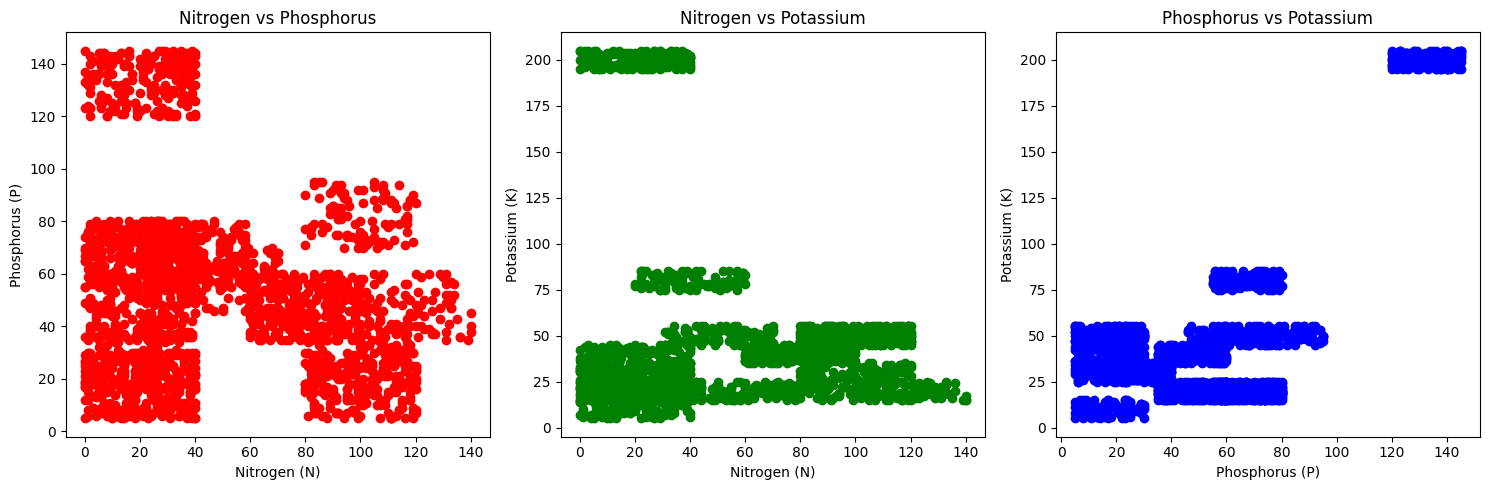

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('../datasets/Crop_Recommendation.csv')

# Assuming the columns for NPK values are named 'N', 'P', and 'K'
nitrogen = df['Nitrogen']
phosphorus = df['Phosphorus']
potassium = df['Potassium']

# Plotting the relationships between N, P, and K
plt.figure(figsize=(15, 5))

# Plot N vs P
plt.subplot(1, 3, 1)
plt.scatter(nitrogen, phosphorus, color='r')
plt.title('Nitrogen vs Phosphorus')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Phosphorus (P)')

# Plot N vs K
plt.subplot(1, 3, 2)
plt.scatter(nitrogen, potassium, color='g')
plt.title('Nitrogen vs Potassium')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Potassium (K)')

# Plot P vs K
plt.subplot(1, 3, 3)
plt.scatter(phosphorus, potassium, color='b')
plt.title('Phosphorus vs Potassium')
plt.xlabel('Phosphorus (P)')
plt.ylabel('Potassium (K)')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [65]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('../datasets/crop_fertilizers.csv')

In [66]:
columns  = ['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorus']
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        column1 = columns[i]
        column2 = columns[j]

        correlation = df[column1].corr(df[column2])
        print(f'Correlation between {column1} and {column2}: {correlation}')




# column1 = 'column_name1'  # Replace 'column_name1' with the actual name of the first column
# column2 = 'column_name2'  # Replace 'column_name2' with the actual name of the second column

# # Create a contingency table
# contingency_table = pd.crosstab(df[column1], df[column2])

# # Calculate Cramér's V
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - ((r - 1) ** 2) / (n - 1)
#     kcorr = k - ((k - 1) ** 2) / (n - 1)
#     return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# cramers_v_statistic = cramers_v(df[column1], df[column2])

# print(f"Association between {column1} and {column2} (Cramér's V): {cramers_v_statistic}")

Correlation between Temperature and Humidity: 0.9755468125036753
Correlation between Temperature and Moisture: 0.14208661512648504
Correlation between Temperature and Nitrogen: -0.053035888453590155
Correlation between Temperature and Potassium: -0.07302458821144633
Correlation between Temperature and Phosphorus: 0.2601756676511698
Correlation between Humidity and Moisture: 0.141612174692772
Correlation between Humidity and Nitrogen: -0.08067907802199971
Correlation between Humidity and Potassium: -0.05589944823748283
Correlation between Humidity and Phosphorus: 0.2575974186275681
Correlation between Moisture and Nitrogen: -0.06337070227079539
Correlation between Moisture and Potassium: 0.06361057446785157
Correlation between Moisture and Phosphorus: -0.037426442842346384
Correlation between Nitrogen and Potassium: -0.48532064969070504
Correlation between Nitrogen and Phosphorus: -0.670973559563184
Correlation between Potassium and Phosphorus: 0.07109275282321009


In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = pd.read_csv('../datasets/crop_fertilizers.csv')

# Load your dataset
# Assuming your dataset is in a Pandas DataFrame named 'data'
# Ensure all features are properly preprocessed and encoded if necessary
# Split your data into featurdata = pd.read_csv('../datasets/crop_fertilizers.csv')
# Here, X contains all columns except 'Fertilizer Name' and Y contains only 'Fertilizer Name'
X = data.drop(columns=['Fertilizer Name'])
Y = data['Fertilizer Name']

# Normalize numerical features
X_numeric = X[['Temperature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorus']]
X_numeric = (X_numeric - X_numeric.mean()) / X_numeric.std()

# Combine numerical and categorical features
X_processed = pd.concat([X_numeric, pd.get_dummies(X[['Soil Type', 'Crop Type']])], axis=1)

# One-hot encode the target (Fertilizer Name)
Y_encoded = pd.get_dummies(Y)

# Define the dimensions of the noise vector
latent_dim = 100

# Define the generator model
def build_generator(latent_dim, num_classes):
    model = keras.Sequential([
        layers.Dense(128, input_dim=latent_dim+num_classes),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dense(X_processed.shape[1], activation='tanh')  # Output layer
    ])
    return model

# Define the discriminator model
def build_discriminator(num_classes):
    model = keras.Sequential([
        layers.Dense(512, input_dim=X_processed.shape[1]+num_classes),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')  # Output layer
    ])
    return model

# Combine the generator and discriminator into a single GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim+num_classes,))
    generated_data = generator(gan_input)
    gan_output = discriminator(layers.concatenate([gan_input, generated_data]))
    gan = keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return gan

# Build the models
num_classes = Y_encoded.shape[1]  # Number of classes for one-hot encoding
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(num_classes)
gan = build_gan(generator, discriminator)

# Training the CGAN
epochs = 10000
batch_size = 32

for epoch in range(epochs):
    # Sample random noise and random labels from the data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, batch_size)
    sampled_labels = tf.keras.utils.to_categorical(sampled_labels, num_classes)

    # Generate a batch of new data
    generated_data = generator.predict(np.concatenate([noise, sampled_labels], axis=1))

    # Combine generated data with real data
    real_data = X_processed.values[np.random.randint(0, X_processed.shape[0], batch_size)]
    real_labels = Y_encoded.sample(batch_size).values
    real_and_generated_data = np.concatenate([real_data, generated_data])
    real_and_generated_labels = np.concatenate([real_labels, sampled_labels])

    # Labels for generated and real data
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += 0.05 * np.random.random(labels.shape)  # Add noise to the labels

    # Train the discriminator
    d_loss = discriminator.train_on_batch(np.concatenate([real_and_generated_data, real_and_generated_labels], axis=1), labels)

    # Sample random noise and random labels
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, batch_size)
    sampled_labels = tf.keras.utils.to_categorical(sampled_labels, num_classes)

    # Labels for generated data
    misleading_targets = np.zeros((batch_size, 1))

    # Train the generator
    g_loss = gan.train_on_batch(np.concatenate([np.concatenate([noise, sampled_labels], axis=1), sampled_labels], axis=1), misleading_targets)

    # Print the progress
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} - D Loss: {d_loss} - G Loss: {g_loss}')

# Generate synthetic data
def generate_synthetic_data(n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, n_samples)
    sampled_labels = tf.keras.utils.to_categorical(sampled_labels, num_classes)
    generated_data = generator.predict(np.concatenate([noise, sampled_labels], axis=1))
    generated_data = pd.DataFrame(generated_data, columns=X_processed.columns)
    return generated_data

# Example of generating synthetic data
synthetic_data = generate_synthetic_data(1000)
print(synthetic_data.head())

# Save synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)

/home/nishanth/Documents/codmav/code/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/nishanth/Documents/codmav/code/.venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 29), found shape=(None, 129)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 129), dtype=float32, sparse=False, name=keras_tensor_127>',)
  • kwargs={'mask': 'None'}